## Project 2

### Step 1: Problem Definition
### Upload and Display the Preprocessed NVIDIA Stock Price Dataset

In this step, we will:

1. **Upload the CSV File:** We start by loading the CSV file that contains the preprocessed NVIDIA stock price data.

2. **Load the Data:** Next, we load the uploaded file into a pandas DataFrame to organize the data for analysis.

3. **Inspect the Data:** Finally, we display the last few rows of the DataFrame to ensure the data has been loaded correctly and to review its structure.

> **Note:** The main code for this project is provided at the end of the report. In the follwoing sections, we are using only `print` statements to show the output.



In [ ]:
# Display the last 3 rows
print(stock_analysis_nvidia_reordered.tail(3))

                Datetime  nvda_high  nvda_low  intel_high  intel_low  \
2160 2024-01-31 20:30:00   2.999291  2.991913    0.034181   0.008311   
2161 2024-01-31 21:00:00   3.018106  3.032854    0.049490   0.056357   
2162 2024-02-01 14:30:00   3.031754  3.055483    0.067500   0.066329   

      intel_close  amd_high   amd_low  amd_close  qcom_high  ...  \
2160     0.043006  3.010035  2.989201   3.021274   0.388800  ...   
2161     0.063338  2.995582  2.995573   3.027304   0.352011  ...   
2162     0.056018  3.070219  3.070850   3.084364   0.336244  ...   

      Other Properties  Tradeand Other Payables Non Current  \
2160         -5.964584                            -0.399949   
2161         -5.964584                            -0.399949   
2162         -5.964584                            -0.399949   

      Cash Dividends Paid  Change In Prepaid Assets  Changes In Cash  \
2160             0.587578                 -3.975466         1.595963   
2161             0.587578                

---

### Time Windows for NVIDIA Stock

- **History:** `2023-01-03 14:30` to `2023-10-04 17:30`  
- **Performance:** `2023-10-04 18:30` to `2024-02-01 14:30`  
*(Hourly basis)*



---

### Create a New Target Variable

We will create a new target variable in our dataset based on the difference between `nvda_open` and `nvda_close`:

1. **Calculate the Difference:** Compute the difference between the `nvda_open` and `nvda_close` columns.

2. **Assign Target Values:**
   - If the difference is positive, we assign a value of 1.
   - If the difference is negative, we assign a value of 0.



In [ ]:
print("The 'target' column:")
print(stock_analysis_nvidia_reordered['target'])

The 'target' column:
0       0
1       0
2       0
3       1
4       0
       ..
2158    1
2159    0
2160    1
2161    1
2162    1
Name: target, Length: 2163, dtype: int64


---

### Examine the Distribution of the Target Variable

To understand the distribution of our target variable, we will:

1. **Calculate the Distribution:** Utilize the `value_counts()` function to determine the number of occurrences of each value (0 and 1) in the target variable.

2. **Display the Results:** Print the distribution to observe the number of instances for each class.

This analysis will reveal the balance between the two classes in our target variable. If we find an imbalance, we can address it using techniques such as resampling, adjusting class weights, or employing ensemble methods like bagging and boosting.



In [ ]:
# Print results
print(value_counts_combined)
print(f"\nThe data is {'imbalanced' if is_imbalanced else 'not significantly imbalanced'} (threshold: {imbalance_threshold}%).")

        Count  Percentage
target                   
0        1161   53.675451
1        1002   46.324549

The data is not significantly imbalanced (threshold: 55%).


---

### Drop Unnecessary Columns

Since the `nvda_open` and `nvda_close` columns were used to create the target variable, they are no longer needed for our analysis.

We will remove these columns from the DataFrame to streamline the dataset.




In [ ]:
# Print the columns that were dropped
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: ['nvda_open', 'nvda_close']


---

### Split the Data into Training, Test, and Validation Sets

We will split our data into three distinct sets: training, test, and validation. The data is sorted based on a `Datetime` column, and we will perform the split based on indices to ensure there are no overlaps between the sets.

1. **Define the Split Ratios:** We will allocate 70% of the data to the training set, 20% to the test set, and 10% to the validation set.

2. **Perform the Split:** Using index-based splitting, we will separate the data into the three sets according to the defined ratios. This ensures that each set contains unique data with no overlaps.

In [ ]:
# Print the sizes of the splits to verify
print(f"Train data shape: {train_data.shape} ({train_percentage:.2f}%)")
print(f"Test data shape: {test_data.shape} ({test_percentage:.2f}%)")
print(f"Validation data shape: {validation_data.shape} ({validation_percentage:.2f}%)")

Train data shape: (1514, 50) (70.00%)
Test data shape: (432, 50) (19.97%)
Validation data shape: (217, 50) (10.03%)


---

### Check Overlap Between Datasets

To determine if there is any overlap between the training, testing, and validation datasets, we can print the minimum and maximum datetime values from each DataFrame.



In [ ]:
print("\n'`Datetime`' range in the training dataset: {} to {}".format(train_data['Datetime'].min(), train_data['Datetime'].max()))
print("\n'Datetime' range in the test dataset: {} to {}".format(test_data['Datetime'].min(), test_data['Datetime'].max()))
print("\n'Datetime' range in the validation dataset: {} to {}".format(validation_data['Datetime'].min(), validation_data['Datetime'].max()))


'`Datetime`' range in the training dataset: 2023-01-03 14:30:00 to 2023-10-04 17:30:00

'Datetime' range in the test dataset: 2023-10-04 18:30:00 to 2023-12-20 21:00:00

'Datetime' range in the validation dataset: 2023-12-21 14:30:00 to 2024-02-01 14:30:00


---

### Step 2: Model Training

We use three classification algorithms to predict NVIDIA stock market prices: **Random Forest**, **Support Vector Machines (SVM)**, and **Logistic Regression**. Each model's performance is optimized through hyperparameter tuning.

Here's how hyperparameter tuning is applied to each model:

- **Random Forest**: This algorithm relies on a collection of decision trees. The key hyperparameters tuned are:
  - `n_estimators`: The number of trees in the forest. We tested values `[50, 100, 150, 200]`.
  - `max_depth`: The maximum depth of each tree. We tested values `[None, 10, 20, 30]`.
  - `min_samples_split`: The minimum number of samples required to split an internal node. We tested values `[2, 5, 10]`.
  - `min_samples_leaf`: The minimum number of samples required to be at a leaf node. We tested values `[1, 2, 4]`.
  
  We use GridSearchCV to systematically explore combinations of these parameters to find the best configuration.

- **Support Vector Machines (SVM)**: SVMs find the optimal hyperplane that separates classes. Key hyperparameters tuned are:
  - `C`: The regularization parameter. We tested values `[0.1, 1, 10, 100]`.
  - `kernel`: The type of kernel function used. We tested `['linear', 'rbf']`.
  - `gamma`: The kernel coefficient for RBF kernels. We tested values `['scale', 'auto']`.
  
  GridSearchCV is used to test various combinations of these hyperparameters to find the optimal setting.

- **Logistic Regression**: This algorithm estimates the probability of a binary outcome. Hyperparameters tuned are:
  - `C`: The inverse of regularization strength. We tested values `[0.01, 0.1, 1, 10]`.
  - `penalty`: The type of regularization used. We tested `'l2'`.
  
  GridSearchCV explores different values for these parameters to determine the best performing model.

For each model, GridSearchCV performs an exhaustive search over specified parameter values, using cross-validation to evaluate model performance for each parameter combination. This helps in identifying the hyperparameter values that yield the best performance on the training data.


In [ ]:
# Print hyperparameters sets
print("### Hyperparameters for Random Forest")
print(rf_params_df.to_markdown(index=False))
print("\n### Hyperparameters for Support Vector Machines (SVM)")
print(svm_params_df.to_markdown(index=False))
print("\n### Hyperparameters for Logistic Regression")
print(log_reg_params_df.to_markdown(index=False))

### Hyperparameters for Random Forest
| Parameter         | Values              |
|:------------------|:--------------------|
| n_estimators      | [50, 100, 150, 200] |
| max_depth         | [None, 10, 20, 30]  |
| min_samples_split | [2, 5, 10]          |
| min_samples_leaf  | [1, 2, 4]           |

### Hyperparameters for Support Vector Machines (SVM)
| Parameter   | Values            |
|:------------|:------------------|
| C           | [0.1, 1, 10, 100] |
| kernel      | ['linear', 'rbf'] |
| gamma       | ['scale', 'auto'] |

### Hyperparameters for Logistic Regression
| Parameter   | Values             |
|:------------|:-------------------|
| C           | [0.01, 0.1, 1, 10] |
| penalty     | ['l2']             |


---

### Step 3: Model Evaluation

In this step, we evaluate the performance of our classification models—Random Forest, Support Vector Machines (SVM), and Logistic Regression—using the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (ROC AUC).

#### ROC Curve

The ROC curve is a graphical representation of a model's performance across different classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

- **True Positive Rate (TPR)**, also known as Sensitivity or Recall, measures the proportion of actual positives correctly identified by the model.
- **False Positive Rate (FPR)** measures the proportion of actual negatives incorrectly classified as positives.

A ROC curve closer to the top-left corner indicates a better performance, as it reflects higher TPR and lower FPR.

#### ROC AUC

The ROC AUC score quantifies the overall ability of the model to discriminate between positive and negative classes. It is the area under the ROC curve and ranges from 0 to 1:

- **AUC = 0.5**: The model performs no better than random guessing.
- **0.5 < AUC < 1**: The model has some predictive power, with higher values indicating better performance.
- **AUC = 1**: The model perfectly distinguishes between positive and negative classes.

#### Model Performance

**1. Random Forest**:
- **Validation Set**: The ROC AUC for the Random Forest model is **0.648**. This indicates a moderate ability to distinguish between classes, with the ROC curve showing a fair performance but not optimal.
- **Test Set**: The ROC AUC for the Random Forest model is **0.607**. This value suggests a similar level of performance as the validation set, reflecting consistent but moderate class separation.

**2. Support Vector Machines (SVM)**:
- **Validation Set**: The ROC AUC for the SVM model is **0.823**. This indicates an excellent ability to discriminate between classes, with the ROC curve positioned well towards the top-left corner, demonstrating strong performance.
- **Test Set**: The ROC AUC for the SVM model is **0.835**. This value reflects even better performance compared to the validation set, showing improved class separation.

**3. Logistic Regression**:
- **Validation Set**: The ROC AUC for the Logistic Regression model is **0.821**. This indicates strong performance, with the ROC curve close to the top-left corner, reflecting good class separation.
- **Test Set**: The ROC AUC for the Logistic Regression model is **0.804**. This value is slightly lower than the validation set, but still shows robust performance.

### Summary

The ROC AUC curve provides a visual and quantitative measure of a model's performance. By comparing the ROC AUC scores of the different models:

- **SVM** emerges as the top performer with the highest ROC AUC values on both validation and test datasets, indicating the best class separation ability.
- **Logistic Regression** also performs strongly with high ROC AUC scores, though slightly lower than SVM.
- **Random Forest** shows the lowest ROC AUC values, indicating moderate performance in class discrimination.

Overall, SVM is the most effective model for distinguishing between classes in this evaluation.


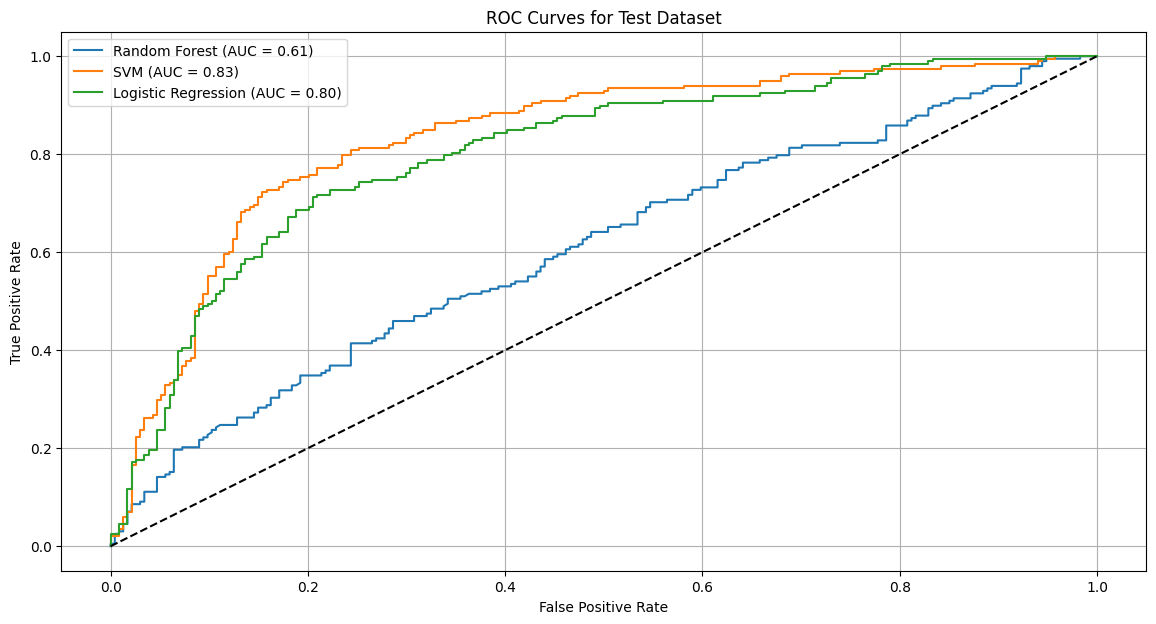

Best Model on Test Set (ROC AUC): SVM with ROC AUC 0.83


In [ ]:
# Plot ROC curves for test dataset
plot_roc_curves(
    [y_test_prob_rf, y_test_prob_svm, y_test_prob_log_reg],
    [y_test] * 3,
    ['Random Forest', 'SVM', 'Logistic Regression'],
    'ROC Curves for Test Dataset'
)

print(f'Best Model on Test Set (ROC AUC): {best_model_test[0]} with ROC AUC {best_model_test[1]:.2f}')

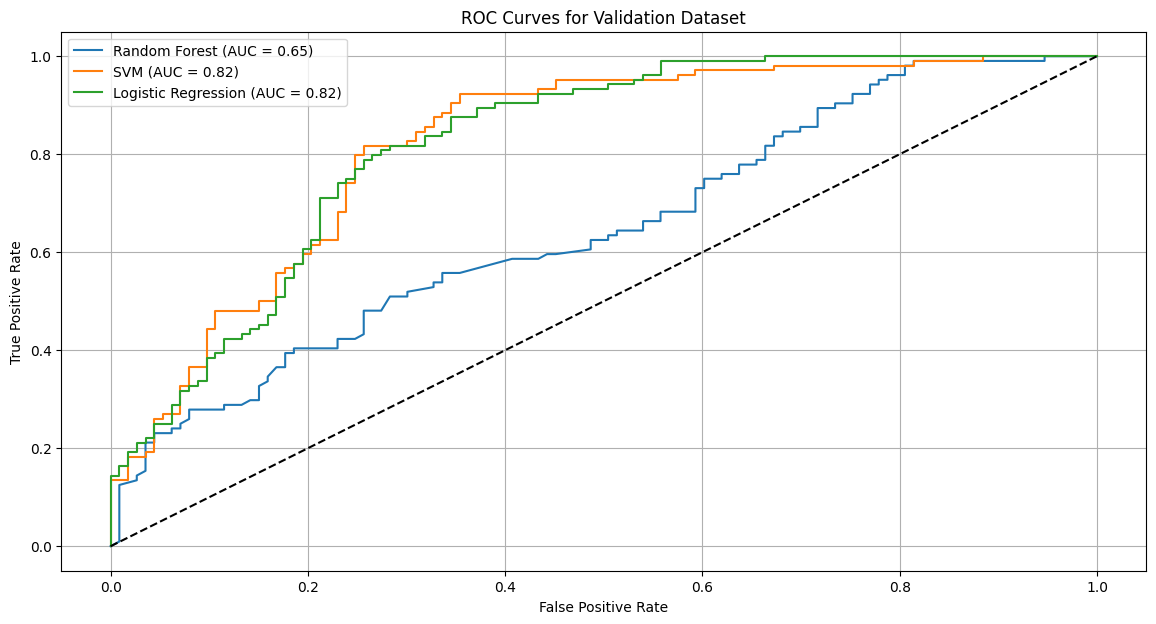

Best Model on Validation Set (ROC AUC): SVM with ROC AUC 0.82


In [ ]:
# Plot ROC curves for validation dataset
plot_roc_curves(
    [y_validation_prob_rf, y_validation_prob_svm, y_validation_prob_log_reg],
    [y_validation] * 3,
    ['Random Forest', 'SVM', 'Logistic Regression'],
    'ROC Curves for Validation Dataset'
)

print(f'Best Model on Validation Set (ROC AUC): {best_model_val[0]} with ROC AUC {best_model_val[1]:.2f}')

---

## Confusion Matrix in Stock Market Prediction

In the context of stock market prediction, a confusion matrix helps evaluate the performance of a classification model used to predict stock price movements, such as whether a stock price will go up or down. It provides a detailed breakdown of prediction results, highlighting where the model performs well and where it might be making errors.


### Key Metrics

**False Positive (FP):** In stock market prediction, a false positive occurs when the model predicts a price increase when there is none. This can lead to incorrect buy signals, potentially resulting in financial losses or suboptimal trading decisions.

**False Negative (FN):** A false negative happens when the model fails to predict a price increase that actually occurs. This means missing out on potential gains because the model did not signal a buying opportunity.

### Confusion Matrix Example

|                   | Predicted Increase | Predicted No Increase |
|-------------------|---------------------|------------------------|
| **Actual Increase** | TP                  | FN                     |
| **Actual No Increase** | FP                  | TN                     |

### Importance

Understanding FP and FN in stock market prediction is crucial for improving trading strategies. By analyzing these metrics, traders and analysts can refine their models to reduce errors, improve prediction accuracy, and make better-informed trading decisions.


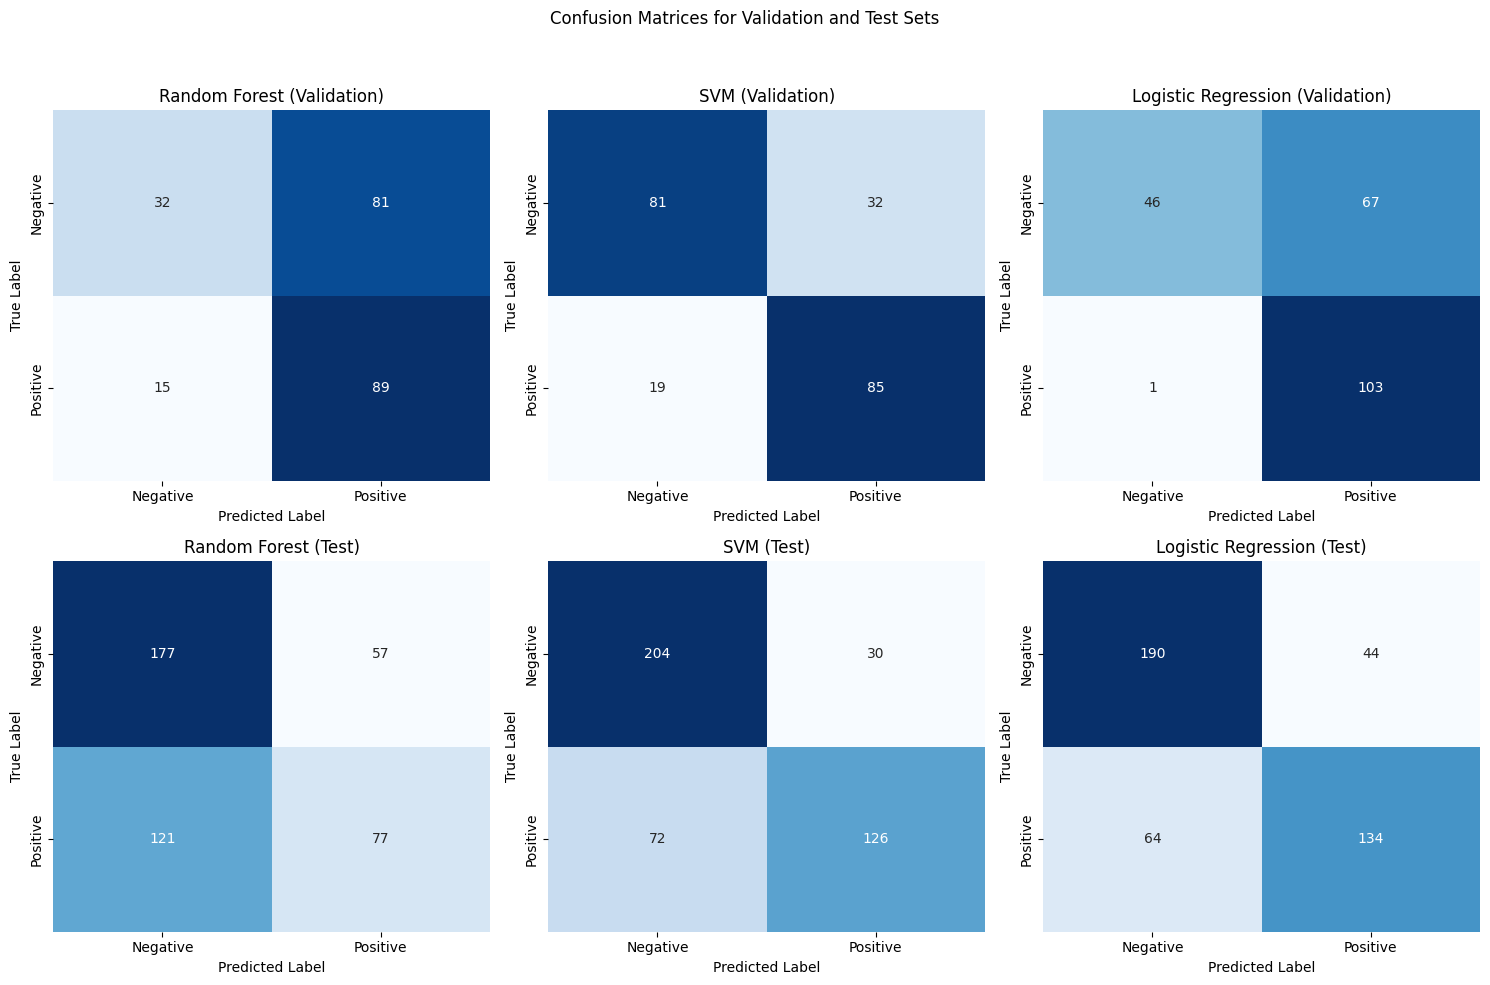

If we had to focus on minimizing false positives, we would choose the logistic regression model.
If we had to focus on minimizing false negatives, we would choose the SVM model.
In the context of the stock market, false positives are less desirable; therefore, we focus on minimizing them. Hence, the logistic regression model is preferred.


In [ ]:
plot_confusion_matrices(confusion_matrices, 'Confusion Matrices for Validation and Test Sets')

print("If we had to focus on minimizing false positives, we would choose the logistic regression model.")
print("If we had to focus on minimizing false negatives, we would choose the SVM model.")
print("In the context of the stock market, false positives are less desirable; therefore, we focus on minimizing them. Hence, the logistic regression model is preferred.")

---

### Model Performance Evaluation

The performance of three classification models—**Random Forest**, **Support Vector Machines (SVM)**, and **Logistic Regression**—was evaluated using accuracy, precision, F1 score, and ROC AUC on both validation and test datasets. Below are the findings and explanations for their performance:

#### Random Forest

- **Validation Data**:
  - **Accuracy** and **F1 Score** are relatively low, indicating that the Random Forest model may not be effectively capturing the complex patterns and volatility inherent in stock price movements.
  - The **ROC AUC** score of 64.8% suggests that while the model can somewhat differentiate between classes, it struggles to make strong distinctions. This could be due to the model's sensitivity to noisy data or the need for more tuning and feature engineering.

- **Test Data**:
  - The slight improvement in **Accuracy** to 58.8% and **F1 Score** to 57.3% reflects minor gains but not substantial changes. The **ROC AUC** score of 60.7% indicates ongoing challenges with class separation.
  - Random Forest may struggle with stock price prediction because it might not capture the sequential dependencies in stock data effectively. Additionally, the model’s performance could be hampered by a lack of important features or an overfitting issue.

#### Support Vector Machines (SVM)

- **Validation Data**:
  - **Accuracy** of 76.5%, **Precision** of 77.0%, and **F1 Score** of 76.5% indicate that SVM effectively captures the underlying patterns in stock price data.
  - The **ROC AUC** score of 82.3% signifies strong class separation, meaning SVM is adept at distinguishing between different price movements. This performance is likely due to SVM’s ability to find a robust decision boundary that separates classes well, even in high-dimensional spaces.

- **Test Data**:
  - Performance remains consistent with **Accuracy** of 76.4% and **F1 Score** of 76.0%. The **ROC AUC** score increases to 83.5%, showing improved class separation on the test set.
  - SVM’s robust performance is attributed to its effective handling of complex data distributions and its ability to generalize well to unseen data, making it suitable for stock price predictions where accurate class separation is critical.

#### Logistic Regression

- **Validation Data**:
  - Logistic Regression shows **Accuracy** of 68.7% and **Precision** of 80.0%. The **F1 Score** of 66.0% suggests a good balance between precision and recall, which is crucial for practical stock price predictions.
  - The **ROC AUC** score of 82.1% indicates strong class separation. Logistic Regression’s performance can be attributed to its linear approach, which works well when the relationship between features and target classes is approximately linear.

- **Test Data**:
  - On the test dataset, **Accuracy** remains high at 75.0%, and **Precision** is also 75.0%. The **F1 Score** of 74.8% shows that the model maintains its balance between precision and recall.
  - The slight decrease in **ROC AUC** to 80.4% may be due to differences between the validation and test datasets or the model’s sensitivity to feature variations. Nonetheless, Logistic Regression continues to perform well, reflecting its suitability for stock price prediction where simplicity and interpretability are valuable.






In [ ]:
metrics_df

,Model,Dataset,Accuracy,Precision,F1 Score,ROC AUC
0,Random Forest,Validation,0.558,0.605,0.520,0.648
1,Random Forest,Test,0.588,0.585,0.573,0.607
2,SVM,Validation,0.765,0.770,0.765,0.823
3,SVM,Test,0.764,0.771,0.760,0.835
4,Logistic Regression,Validation,0.687,0.800,0.660,0.821
5,Logistic Regression,Test,0.750,0.750,0.748,0.804


---

## Model Performance Summary

**SVM** performs well due to its ability to effectively handle complex, high-dimensional data and achieve strong class separation. **Logistic Regression** is also effective, particularly in balancing precision and recall, and offers strong performance in scenarios where linear relationships are appropriate. **Random Forest**, while useful in some contexts, struggles with stock price prediction due to its difficulty in capturing the sequential nature of the data and potential overfitting or feature-related issues.


**Logistic Regression** emerges as the preferred model based on the goal of minimizing false positives. Here’s why:

- **Minimizing False Positives:** Logistic Regression excels at reducing false positives, which is crucial in scenarios where avoiding unnecessary actions or trades is essential.
- **High Precision and ROC AUC:** The model demonstrates high precision and a strong ROC AUC, indicating its effectiveness in correctly identifying positive instances and distinguishing between classes.
- **Comparison to Other Models:** Although SVM shows higher accuracy and overall performance, Logistic Regression’s strength in minimizing false positives makes it the better choice for avoiding unnecessary actions.



---

***MAIN PYTHON CODE FOLLOWS:***

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_auc_score,
                             precision_score, f1_score, accuracy_score, roc_curve)
from sklearn.model_selection import GridSearchCV

# Load the dataset
url = 'https://raw.githubusercontent.com/sivasrinivasnarra/AI-ML/refs/heads/main/stock_analysis_nvidia.csv'
stock_analysis_nvidia = pd.read_csv(url)

# Reorder columns to move 'Datetime' to the start
columns = ['Datetime'] + [col for col in stock_analysis_nvidia.columns if col != 'Datetime']
stock_analysis_nvidia_reordered = stock_analysis_nvidia[columns]

# Ensure the 'Datetime' column is in datetime format
stock_analysis_nvidia_reordered['Datetime'] = pd.to_datetime(stock_analysis_nvidia_reordered['Datetime'])

# Filter data to include only records from 2023-01-01 onwards
stock_analysis_nvidia_reordered = stock_analysis_nvidia_reordered[stock_analysis_nvidia_reordered['Datetime'] >= '2023-01-01']

# Reset the index of the DataFrame
stock_analysis_nvidia_reordered.reset_index(drop=True, inplace=True)


# Create a new column 'target' based on the condition using .loc to avoid SettingWithCopyWarning
stock_analysis_nvidia_reordered.loc[:, 'target'] = (stock_analysis_nvidia_reordered['nvda_close'] > stock_analysis_nvidia_reordered['nvda_open']).astype(int)

# Drop columns that are not needed
columns_to_drop = ['nvda_open', 'nvda_close']
stock_analysis_nvidia_reordered = stock_analysis_nvidia_reordered.drop(columns=columns_to_drop)

# Sort the DataFrame by 'Datetime'
stock_analysis_nvidia_reordered = stock_analysis_nvidia_reordered.sort_values(by='Datetime')

# Count occurrences and calculate percentages
value_counts = stock_analysis_nvidia_reordered['target'].value_counts()
value_counts_combined = pd.DataFrame({
    'Count': value_counts,
    'Percentage': stock_analysis_nvidia_reordered['target'].value_counts(normalize=True) * 100
})

# Check for imbalance
imbalance_threshold = 55
is_imbalanced = (value_counts_combined['Percentage'] > imbalance_threshold).any()

# Calculate the split indices
total_records = len(stock_analysis_nvidia_reordered)
train_end_idx = int(total_records * 0.70)
test_end_idx = int(total_records * 0.90)

# Split the data into training, test, and validation sets
train_data = stock_analysis_nvidia_reordered.iloc[:train_end_idx]
test_data = stock_analysis_nvidia_reordered.iloc[train_end_idx:test_end_idx]
validation_data = stock_analysis_nvidia_reordered.iloc[test_end_idx:]

total_size = len(train_data) + len(test_data) + len(validation_data)

# Calculate percentages
train_percentage = round((len(train_data) / total_size) * 100, 2)
test_percentage = round((len(test_data) / total_size) * 100, 2)
validation_percentage = round((len(validation_data) / total_size) * 100, 2)

# Define target column
target_column = 'target'

# Separate features and target variable for training, test, and validation datasets
X_train = train_data.drop(columns=[target_column, 'Datetime'])
y_train = train_data[target_column]

X_test = test_data.drop(columns=[target_column, 'Datetime'])
y_test = test_data[target_column]

X_validation = validation_data.drop(columns=[target_column, 'Datetime'])
y_validation = validation_data[target_column]

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf = grid_search_rf.best_estimator_

# Predict on validation and test sets
y_validation_pred_rf = best_rf.predict(X_validation)
y_test_pred_rf = best_rf.predict(X_test)

# Get predicted probabilities for ROC AUC
y_validation_prob_rf = best_rf.predict_proba(X_validation)[:, 1]
y_test_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


# Initialize the Support Vector Classifier with probability=True for ROC AUC
svm = SVC(probability=True, random_state=42)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best estimator from the grid search
best_svm = grid_search_svm.best_estimator_

# Predict on validation and test sets
y_validation_pred_svm = best_svm.predict(X_validation)
y_test_pred_svm = best_svm.predict(X_test)

# Get predicted probabilities for ROC AUC
y_validation_prob_svm = best_svm.predict_proba(X_validation)[:, 1]
y_test_prob_svm = best_svm.predict_proba(X_test)[:, 1]

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Initialize GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Get the best estimator from the grid search
best_log_reg = grid_search_log_reg.best_estimator_

# Predict on validation and test sets
y_validation_pred_log_reg = best_log_reg.predict(X_validation)
y_test_pred_log_reg = best_log_reg.predict(X_test)

# Get predicted probabilities for ROC AUC
y_validation_prob_log_reg = best_log_reg.predict_proba(X_validation)[:, 1]
y_test_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

rf_params_df = pd.DataFrame(list(rf_param_grid.items()), columns=['Parameter', 'Values'])
svm_params_df = pd.DataFrame(list(svm_param_grid.items()), columns=['Parameter', 'Values'])
log_reg_params_df = pd.DataFrame(list(log_reg_param_grid.items()), columns=['Parameter', 'Values'])

# Define a function to compute metrics
def compute_metrics(y_true, y_pred, y_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_true, y_prob) if y_prob is not None else np.nan
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, precision, f1, auc_roc, confusion

# Compute metrics for each model and dataset type
metrics = []

for model_name, y_pred_val, y_prob_val, y_true_val, y_pred_test, y_prob_test, y_true_test in [
    ('Random Forest', y_validation_pred_rf, y_validation_prob_rf, y_validation, y_test_pred_rf, y_test_prob_rf, y_test),
    ('SVM', y_validation_pred_svm, y_validation_prob_svm, y_validation, y_test_pred_svm, y_test_prob_svm, y_test),
    ('Logistic Regression', y_validation_pred_log_reg, y_validation_prob_log_reg, y_validation, y_test_pred_log_reg, y_test_prob_log_reg, y_test)
]:
    # Validation metrics
    accuracy, precision, f1, auc_roc, confusion = compute_metrics(y_true_val, y_pred_val, y_prob_val)
    metrics.append({
        'Model': model_name,
        'Dataset': 'Validation',
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1,
        'ROC AUC': auc_roc
    })

    # Test metrics
    accuracy, precision, f1, auc_roc, confusion = compute_metrics(y_true_test, y_pred_test, y_prob_test)
    metrics.append({
        'Model': model_name,
        'Dataset': 'Test',
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1,
        'ROC AUC': auc_roc
    })

# Define confusion matrices for each model and dataset
confusion_matrices = {
    'Validation': {
        'Random Forest': confusion_matrix(y_validation, y_validation_pred_rf),
        'SVM': confusion_matrix(y_validation, y_validation_pred_svm),
        'Logistic Regression': confusion_matrix(y_validation, y_validation_pred_log_reg)
    },
    'Test': {
        'Random Forest': confusion_matrix(y_test, y_test_pred_rf),
        'SVM': confusion_matrix(y_test, y_test_pred_svm),
        'Logistic Regression': confusion_matrix(y_test, y_test_pred_log_reg)
    }
}

import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrices(confusion_matrices, title):
    num_models = len(confusion_matrices['Validation'])  # Number of models
    num_datasets = len(confusion_matrices)  # Number of datasets

    # Define the layout based on the number of models and datasets
    num_rows = min(num_datasets, 3)
    num_cols = max(num_models, 2)

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows

    for i, (dataset_name, cm_dict) in enumerate(confusion_matrices.items()):
        for j, (model_name, cm) in enumerate(cm_dict.items()):
            plt.subplot(num_rows, num_cols, i * num_cols + j + 1)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
            plt.title(f'{model_name} ({dataset_name})')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
    plt.show()



# Define a function to plot ROC curves
def plot_roc_curves(y_probs, y_trues, models, title):
    plt.figure(figsize=(14, 7))

    for y_prob, y_true, model in zip(y_probs, y_trues, models):
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc_score(y_true, y_prob):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Convert metrics list to DataFrame
metrics_df = pd.DataFrame(metrics)

# Round specified numerical columns to 3 decimal places
metrics_df[['Accuracy', 'Precision', 'F1 Score', 'ROC AUC']] = metrics_df[['Accuracy', 'Precision', 'F1 Score', 'ROC AUC']].round(3)

# Calculate ROC AUC for validation dataset
roc_auc_rf_val = roc_auc_score(y_validation, y_validation_prob_rf)
roc_auc_svm_val = roc_auc_score(y_validation, y_validation_prob_svm)
roc_auc_log_reg_val = roc_auc_score(y_validation, y_validation_prob_log_reg)
best_model_val = max(
    [('Random Forest', roc_auc_rf_val), ('SVM', roc_auc_svm_val), ('Logistic Regression', roc_auc_log_reg_val)],
    key=lambda x: x[1]
)


roc_auc_rf_test = roc_auc_score(y_test, y_test_prob_rf)
roc_auc_svm_test = roc_auc_score(y_test, y_test_prob_svm)
roc_auc_log_reg_test = roc_auc_score(y_test, y_test_prob_log_reg)

# Determine and print the best performing model based on ROC AUC
best_model_test = max(
    [('Random Forest', roc_auc_rf_test), ('SVM', roc_auc_svm_test), ('Logistic Regression', roc_auc_log_reg_test)],
    key=lambda x: x[1]
)